In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10/cifar10.tgz


In [2]:

import os
import torch
import torchvision
import tarfile
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

from torch.utils.data.dataloader import DataLoader

from torchvision.utils import make_grid

import torch.nn as nn
import torch.nn.functional as F


In [3]:
# dataset_url = 'http://files.fast.ai/data/examples/cifar10.tgz'
# download_url(dataset_url,'./kaggle/working')

#manually uploaded the file

#extracting the data
with tarfile.open('/kaggle/input/cifar10/cifar10.tgz', 'r:gz') as tar:
    tar.extractall('/kaggle/working/data')

In [4]:
data_dir = '/kaggle/working/data/cifar10'

print(os.listdir(data_dir))


classes = os.listdir(data_dir + '/train')
print(classes)

['train', 'test', 'labels.txt']
['automobile', 'deer', 'cat', 'truck', 'bird', 'frog', 'horse', 'dog', 'ship', 'airplane']


In [5]:
num_airplanes = os.listdir(data_dir + '/train/airplane')
print(len(num_airplanes))


5000


In [6]:
dataset = ImageFolder(data_dir+'/train',transform=ToTensor())


In [7]:
# ?ImageFolder

img,label = dataset[0]
print(img.shape)
print(type(img))
print(img.size())
print(img)

torch.Size([3, 32, 32])
<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.95

In [8]:
#this returns the different classes of data present

print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
# a helper function to show the images

def print_image(img, label):
    plt.imshow(img.permute(1,2,0))
    print(dataset.classes[label])

airplane


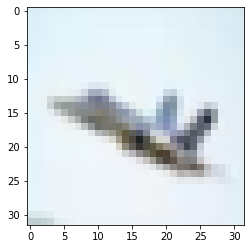

In [10]:
img, label = dataset[0]
print_image(img,label)

In [11]:
#split to train and validation set

random_seed = 42
torch.manual_seed(random_seed)

val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset,[train_size,val_size])

print(len(train_ds),len(val_ds))


45000 5000


In [12]:
batch_size = 128

train_dl = DataLoader(train_ds,batch_size, shuffle=True,num_workers=4,pin_memory=True)
val_dl = DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)


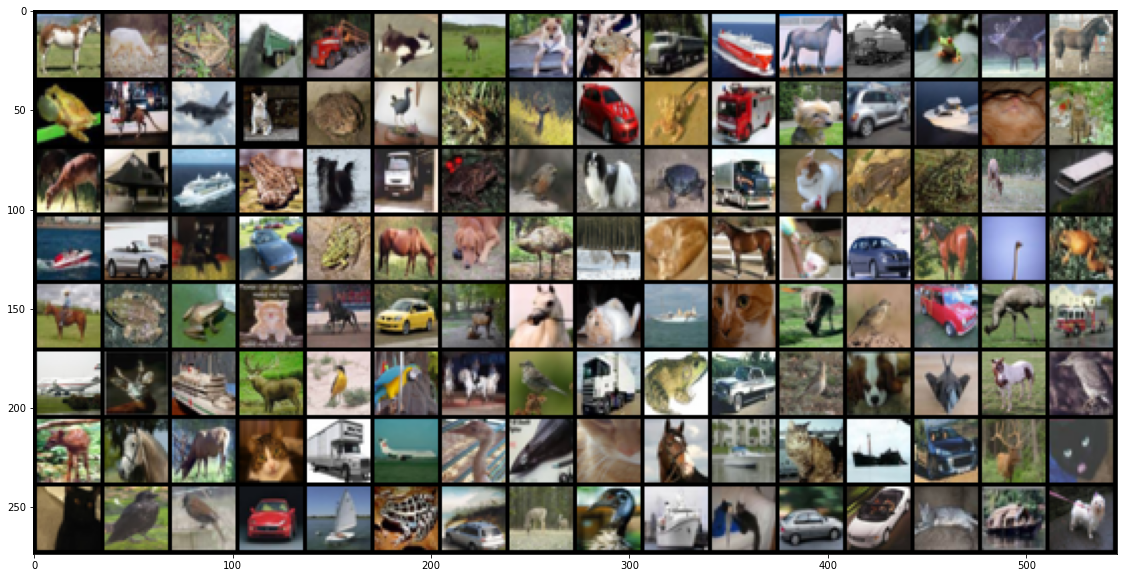

In [13]:
#show a grid of images

for img, label in train_dl:
    plt.figure(figsize=(28,10))
    plt.imshow(make_grid(img, nrow=16).permute(1,2,0))
    break

In [14]:
####testing out convolution and kernel

def apply_kernel_sample(image,kernel):
    ri,ci = image.shape
    rk,ck = kernel.shape
    ro = ri-rk+1
    co = ci-ck+1
    out = torch.zeros([ro,co])
    for i in range(ro):
        for j in range(co):
            out[i,j]= torch.sum(image[i:i+rk,j:j+ck]*kernel)
    
    return out
            

image = torch.randn([7,7])
kernel = torch.randn([3,3])

print(image)
print(kernel)

out = apply_kernel_sample(image, kernel)

print(out)

tensor([[-1.3184,  0.1035, -0.1046,  2.2181, -0.2928,  0.2204,  1.2709],
        [-1.0596, -1.2084, -0.8248, -0.5322,  1.2421,  1.3417,  1.1016],
        [-1.6584,  0.0999, -0.0561, -1.4287,  0.3303,  0.1561, -0.8498],
        [ 1.0393,  2.1812, -0.0815,  1.1114, -0.3818, -1.1721,  1.2171],
        [-0.2766, -0.4602,  0.7143, -2.2011, -1.6510,  0.3437, -0.5657],
        [ 0.5204, -1.5695, -0.2454, -0.3701, -1.0450, -0.4520, -1.5496],
        [ 1.7543,  1.5783, -1.2215,  0.4723,  1.2729,  0.8521, -0.4823]])
tensor([[-0.5442, -1.1567, -0.5914],
        [-0.1787, -1.1280,  1.4779],
        [ 0.4329, -0.7422,  1.7582]])
tensor([[ 0.1024, -3.3145,  1.8649, -0.9111, -2.4217],
        [ 1.2506,  2.8192,  0.9082, -3.1235, -1.5257],
        [-0.4687, -2.3993, -1.2756, -0.3202,  1.3671],
        [-0.4573, -6.8746, -2.7690,  3.1145, -2.9265],
        [-0.9847,  3.1567,  3.4093,  4.2391, -1.6875]])


In [15]:
### trying out a sample CNN model with just one filter and a maxpool layer

simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
#     nn.Conv2d(8,16,kernel_size=3,stride=1,padding=1),
#     nn.MaxPool2d(1,2)
)


for images, label in train_dl:
    print('images.shape' +str(images.shape))
    out = simple_model(images)
    print('output shape' + str(out.shape))
    print('label shape', label.shape)
    break
    

images.shapetorch.Size([128, 3, 32, 32])
output shapetorch.Size([128, 8, 32, 32])
label shape torch.Size([128])


In [16]:
#function to calculate accuracy

def accuracy(output,label):
    _,maxindx = torch.max(output,dim=1)
    return torch.tensor(torch.sum(maxindx==label).item()/len(maxindx))


In [17]:
### define class for the CNN

class ImageClassificationBase (nn.Module):
    def training_step (self,batch):
        img,label = batch
        out = self(img)
        loss = F.cross_entropy(out,label)
        return loss
    
    def validation_step (self,batch):
        img, label = batch
        out =self(img)
        loss =F.cross_entropy(out,label)
        acc = accuracy(out,label)
        return {'val-loss':loss.detach(),'val-acc': acc}
    
    def validation_epoch_end(self,loss_n_acc):
        epoch_loss = [x['val-loss'] for x in loss_n_acc]
        avg_loss = torch.stack(epoch_loss).mean()
        
        epoch_acc = [x['val-acc'] for x in loss_n_acc]
        avg_acc  = torch.stack(epoch_loss).mean()
        return {'val-loss':avg_loss.item(),'val-acc': avg_acc.item()}
      
    def print_result_epoch_end(self,epoch,result):
        print('epoch[{}] - Training loss:{:.4f} Val-loss:{:.4f} Val-Acc:{:.4f}'.format(
            epoch,result['train_loss'],result['val-loss'],result['val-acc']))
        
        
    
        

In [18]:
class MyCifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), #128 x 64 X 16 X 16
            
            nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), #128 x 128 X 8 X 8
            
            nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2), #128 x 256 X 4 X 4
            
            nn.Flatten(),
            nn.Linear(256*4*4,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10))
    
    def forward (self,xb):
        return self.network(xb)
        

In [19]:
model = MyCifar10CnnModel()
model

MyCifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_featur

In [20]:
# running a test to see if the shape is coming as desired

for img, label in train_dl:
    print('image shape:',img.shape)
    out = model(img)
    print('output shape:',out.shape)
    print('out[0]', out[0])
    break

image shape: torch.Size([128, 3, 32, 32])
output shape: torch.Size([128, 10])
out[0] tensor([ 0.0409,  0.0323,  0.0044,  0.0119,  0.0509,  0.0021, -0.0230,  0.0262,
        -0.0246, -0.0064], grad_fn=<SelectBackward>)


In [21]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data,device):
    if isinstance (data,(list,tuple)):
        return [to_device(x,device) for x in data]
    else:
        return data.to(device,non_blocking=True)

class DeviceDataLoader():
    def __init__(self,dl,device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for b in self.dl:
            yield to_device(b,self.device)
        
    def __len__(self):
        return len(self.dl)
              
                  

In [22]:
device = get_default_device()
print(device)

cuda


In [23]:
train_dl = DeviceDataLoader(train_dl,device)
val_dl = DeviceDataLoader(val_dl,device)
model = to_device(model,device)

In [24]:
@torch.no_grad()
def evaluate (model,val_loader):
    model.eval()
    results = [model.validation_step(x) for x in val_loader]
    return model.validation_epoch_end(results)   
    

def fit(lr,epochs,model,train_loader,val_loader,opt_fn=torch.optim.SGD):
    history = []
    optimizer = opt_fn(model.parameters(),lr)
    
    for epoch in range(epochs):
        model.train()
        training_loss = []    
        for batch in train_loader:
            loss = model.training_step(batch)
            training_loss.append(loss)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
            
        results = evaluate(model,val_loader)
        results['train_loss'] = torch.stack(training_loss).mean().item()
    
        model.print_result_epoch_end(epoch,results)
        history.append(results)
    return history

    



In [25]:
model = to_device(MyCifar10CnnModel(),device)

evaluate(model,val_dl)

{'val-loss': 2.3025338649749756, 'val-acc': 2.3025338649749756}

In [26]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [27]:
history = fit( lr,num_epochs, model, train_dl, val_dl, opt_func)

epoch[0] - Training loss:1.7277 Val-loss:1.3737 Val-Acc:1.3737
epoch[1] - Training loss:1.2319 Val-loss:1.0915 Val-Acc:1.0915
epoch[2] - Training loss:0.9530 Val-loss:0.8857 Val-Acc:0.8857
epoch[3] - Training loss:0.7671 Val-loss:0.7645 Val-Acc:0.7645
epoch[4] - Training loss:0.6187 Val-loss:0.7860 Val-Acc:0.7860
epoch[5] - Training loss:0.4924 Val-loss:0.7093 Val-Acc:0.7093
epoch[6] - Training loss:0.3851 Val-loss:0.7378 Val-Acc:0.7378
epoch[7] - Training loss:0.2788 Val-loss:0.8227 Val-Acc:0.8227
epoch[8] - Training loss:0.2040 Val-loss:0.9443 Val-Acc:0.9443
epoch[9] - Training loss:0.1628 Val-loss:0.9656 Val-Acc:0.9656


In [28]:
def plot_accuracies(history):
    accuracies = [x['val-acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

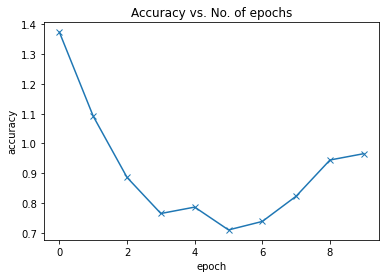

In [29]:
plot_accuracies(history)

In [30]:
def plot_losses(history):
    train_losses = [x['train_loss'] for x in history]
    val_losses = [x['val-loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

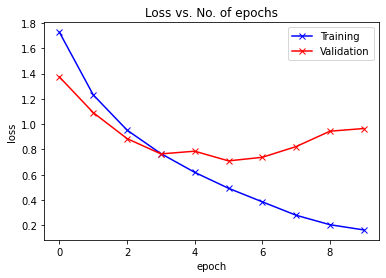

In [31]:
plot_losses(history)

In [32]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

label airplane
predicted airplane


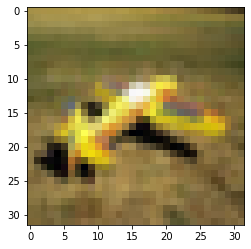

In [36]:
# test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
# result = evaluate(model, test_loader)
# result


img, label = test_dataset[5]
plt.imshow(img.permute(1, 2, 0))

print("label", dataset.classes[label])

xb = to_device(img.unsqueeze(0), device)
yb = model(xb)
_, preds  = torch.max(yb, dim=1)

pred_label = dataset.classes[preds[0].item()]

print("predicted", pred_label)

In [34]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')